In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('for_matrix_short_name.tsv',sep='\t',names=["gene_cluster","crass"])

In [40]:
df

,gene_cluster,crass
0,GC_00000433,c102_node_469
1,GC_00000433,c49_node_189
2,GC_00000433,c68_node_212
3,GC_00000433,p114_node_209
4,GC_00000433,p116_node_212
...,...,...
13940,GC_00000663,c46_node_390
13941,GC_00000663,p17_node_160
13942,GC_00000663,p72_node_404
13943,GC_00001174,p18_node_220


In [41]:
value_counts = df["gene_cluster"].value_counts()

# Filter the DataFrame to keep rows where the first column value appears more than once
filtered_df = df[df["gene_cluster"].isin(value_counts[value_counts > 1].index)]

In [42]:
filtered_df

,gene_cluster,crass
0,GC_00000433,c102_node_469
1,GC_00000433,c49_node_189
2,GC_00000433,c68_node_212
3,GC_00000433,p114_node_209
4,GC_00000433,p116_node_212
...,...,...
13940,GC_00000663,c46_node_390
13941,GC_00000663,p17_node_160
13942,GC_00000663,p72_node_404
13943,GC_00001174,p18_node_220


In [43]:
pivot_df = filtered_df.pivot_table(index='gene_cluster', columns='crass', aggfunc='size', fill_value=0)
pivot_df = pivot_df.applymap(lambda x: 1 if x > 1 else x)


In [44]:
pivot_df

crass,c102_node_357,c102_node_469,c103_node_93,c105_node_57,c107_node_114,c114_node_413,c114_node_486,c116_node_95,c123_node_104,c124_node_185,...,p72_node_83,p77_node_198,p77_node_201,p87_node_235,p87_node_250,p87_node_259,p88_node_100,p88_node_114,p94_node_100,p95ii_node_259
gene_cluster,,,,,,,,,,,,,,,,,,,,,
GC_00000001,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GC_00000002,0,1,0,1,1,1,1,1,0,1,...,1,0,1,1,1,1,0,0,1,1
GC_00000003,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
GC_00000004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
GC_00000005,0,1,0,1,0,0,1,1,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GC_00001214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GC_00001215,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
GC_00001216,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
binary_df = (pivot_df > 0).astype(int)

In [46]:
binary_df

crass,c102_node_357,c102_node_469,c103_node_93,c105_node_57,c107_node_114,c114_node_413,c114_node_486,c116_node_95,c123_node_104,c124_node_185,...,p72_node_83,p77_node_198,p77_node_201,p87_node_235,p87_node_250,p87_node_259,p88_node_100,p88_node_114,p94_node_100,p95ii_node_259
gene_cluster,,,,,,,,,,,,,,,,,,,,,
GC_00000001,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GC_00000002,0,1,0,1,1,1,1,1,0,1,...,1,0,1,1,1,1,0,0,1,1
GC_00000003,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
GC_00000004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
GC_00000005,0,1,0,1,0,0,1,1,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GC_00001214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GC_00001215,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
GC_00001216,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
binary_df.to_csv('binary_matrix.tsv', sep='\t')

In [48]:
def calculate_shared_percentage(col1, col2):
    shared = sum((col1 == 1) & (col2 == 1))
    total = sum((col1 == 1) | (col2 == 1))
    return (shared / total) * 100 if total > 0 else 0

# Get the list of crass columns
crass_columns = binary_df.columns

# Create an empty dataframe to store the results
result_df = pd.DataFrame(index=crass_columns, columns=crass_columns)

# Calculate the percentage for each pair of columns
for i, col1 in enumerate(crass_columns):
    for j, col2 in enumerate(crass_columns):
        if i <= j:  # We only need to calculate the upper triangle
            percentage = calculate_shared_percentage(binary_df[col1], binary_df[col2])
            result_df.loc[col1, col2] = percentage
            result_df.loc[col2, col1] = percentage  # The matrix is symmetric

# Fill diagonal with 100% (each column fully shares with itself)
np.fill_diagonal(result_df.values, 100)

#Round the percentages to two decimal places
result_df = result_df.round(2)

In [49]:
result_df

crass,c102_node_357,c102_node_469,c103_node_93,c105_node_57,c107_node_114,c114_node_413,c114_node_486,c116_node_95,c123_node_104,c124_node_185,...,p72_node_83,p77_node_198,p77_node_201,p87_node_235,p87_node_250,p87_node_259,p88_node_100,p88_node_114,p94_node_100,p95ii_node_259
crass,,,,,,,,,,,,,,,,,,,,,
c102_node_357,100,6.569343,22.033898,9.090909,31.623932,32.5,6.626506,9.558824,9.868421,7.792208,...,5.128205,16.911765,31.967213,8.843537,29.133858,8.609272,16.911765,22.131148,32.478632,5.031447
c102_node_469,6.569343,100,7.575758,9.210526,7.801418,7.534247,9.375,12.21374,8.552632,9.333333,...,7.488987,5.369128,7.432432,41.071429,7.284768,10.204082,5.369128,6.521739,7.746479,5.095541
c103_node_93,22.033898,7.575758,100,10.067114,22.95082,22.047244,8.125,9.848485,9.395973,8.0,...,5.676856,28.099174,21.705426,9.090909,18.518519,9.589041,28.099174,88.311688,22.764228,3.821656
c105_node_57,9.090909,9.210526,10.067114,100,8.75,9.146341,41.726619,38.52459,23.84106,25.675676,...,7.692308,8.484848,9.036145,11.111111,8.87574,73.584906,8.484848,9.74026,9.375,18.35443
c107_node_114,31.623932,7.801418,22.95082,8.75,100,39.830508,7.017544,8.391608,7.453416,7.5,...,5.439331,16.197183,39.166667,8.496732,28.787879,8.280255,16.197183,22.047244,91.666667,3.592814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p87_node_259,8.609272,10.204082,9.589041,73.584906,8.280255,8.695652,47.328244,41.025641,25.342466,27.272727,...,7.81893,8.024691,8.588957,12.820513,7.784431,100,8.024691,8.552632,8.227848,18.831169
p88_node_100,16.911765,5.369128,28.099174,8.484848,16.197183,16.438356,6.818182,8.108108,7.878788,7.272727,...,4.471545,93.181818,16.216216,6.875,15.89404,8.024691,100,28.0,16.901408,3.488372
p88_node_114,22.131148,6.521739,88.311688,9.74026,22.047244,24.031008,7.228916,9.489051,9.090909,8.441558,...,6.008584,28.0,23.664122,10.273973,18.705036,8.552632,28.0,100,22.834646,3.703704


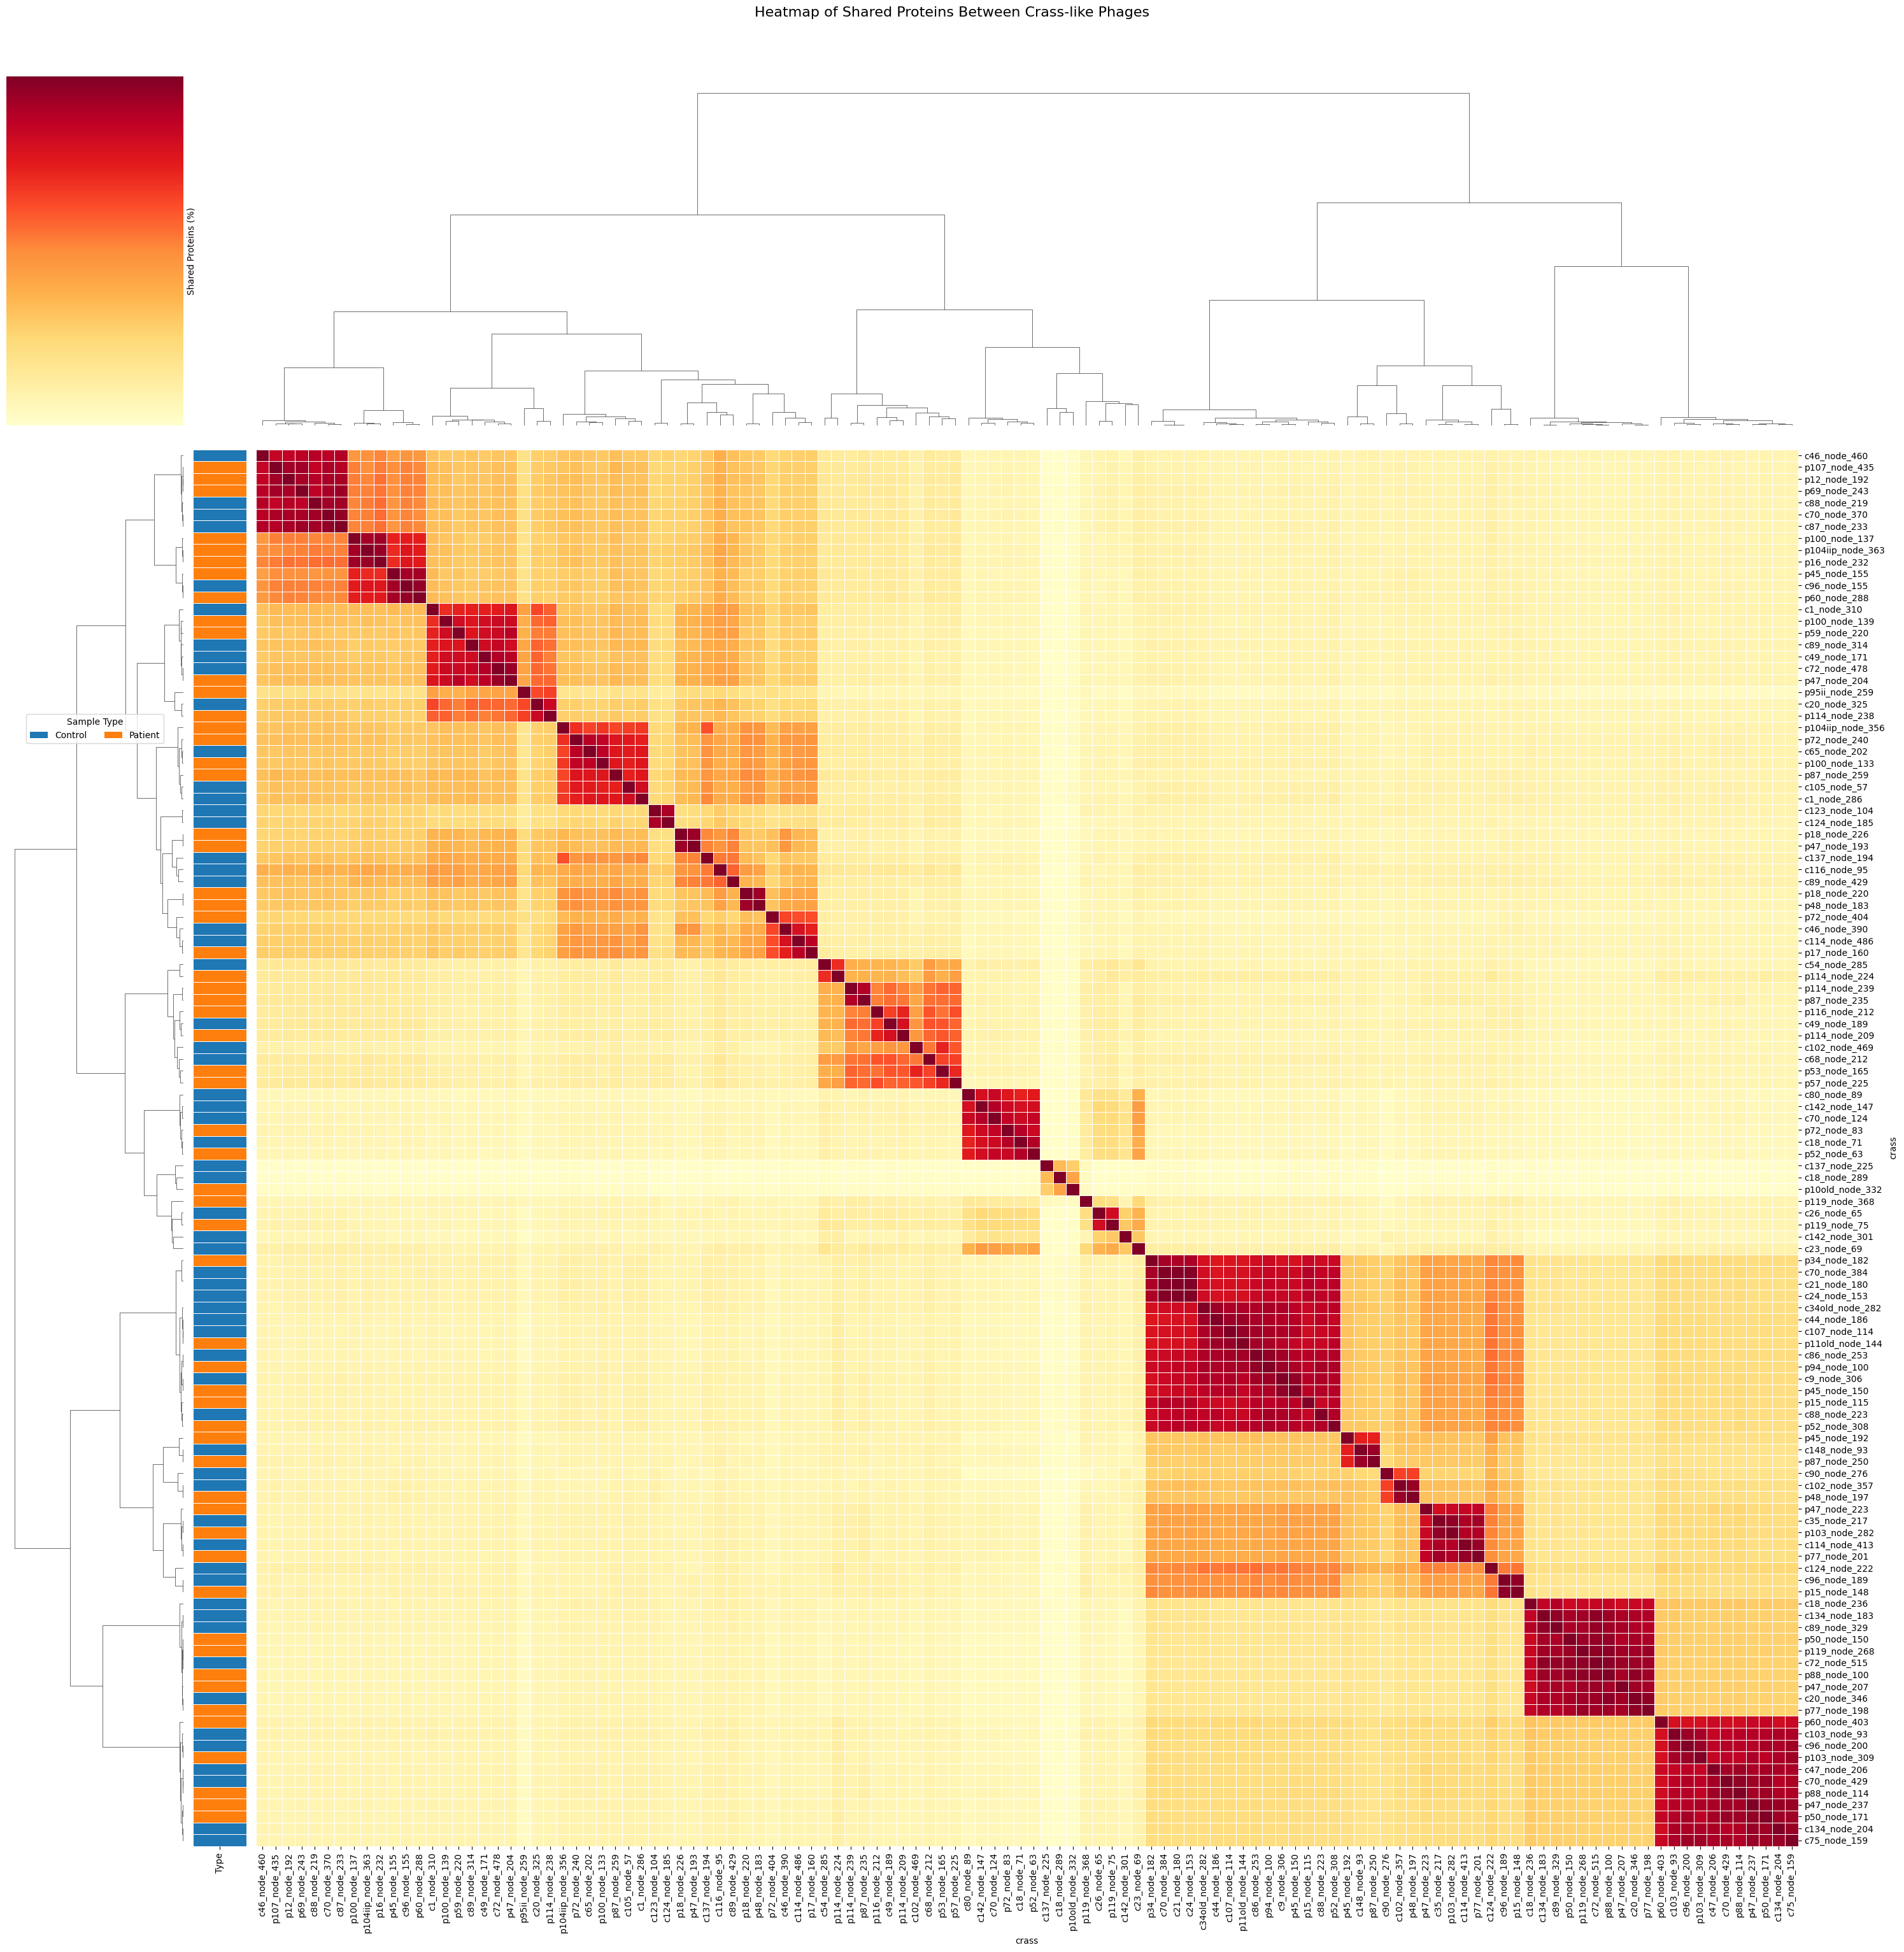

In [50]:
result_df = result_df.astype(float)
# Create a new dataframe for the sample type
sample_type = pd.DataFrame(index=result_df.index)
sample_type['Type'] = ['Control' if name.startswith('c') else 'Patient' for name in result_df.index]

# Create a color palette for the sample types
colors = {'Control': '#1f77b4', 'Patient': '#ff7f0e'}

# Create the clustered heatmap with the additional color bar, with ward method
g = sns.clustermap(result_df, 
                   cmap="YlOrRd",
                   annot=False,  
                   linewidths=0.5,
                   row_cluster=True,
                   col_cluster=True,
                   cbar_kws={'label': 'Shared Proteins (%)'},
                   dendrogram_ratio=(.1, .2),
                   figsize=(30, 30),
                   row_colors=sample_type['Type'].map(colors),
                   method='ward')

# Customize the plot
plt.suptitle("Heatmap of Shared Proteins Between Crass-like Phages", fontsize=16, y=1.02)
plt.xticks([])
plt.yticks([])

# Add a legend for the sample types
for label in colors:
    g.ax_row_dendrogram.bar(0, 0, color=colors[label], label=label, linewidth=0)
g.ax_row_dendrogram.legend(title='Sample Type', loc="center", ncol=2, bbox_to_anchor=(0.5, 0.8))

plt.tight_layout()
plt.show()
g.savefig("heatmap_huge.pdf")

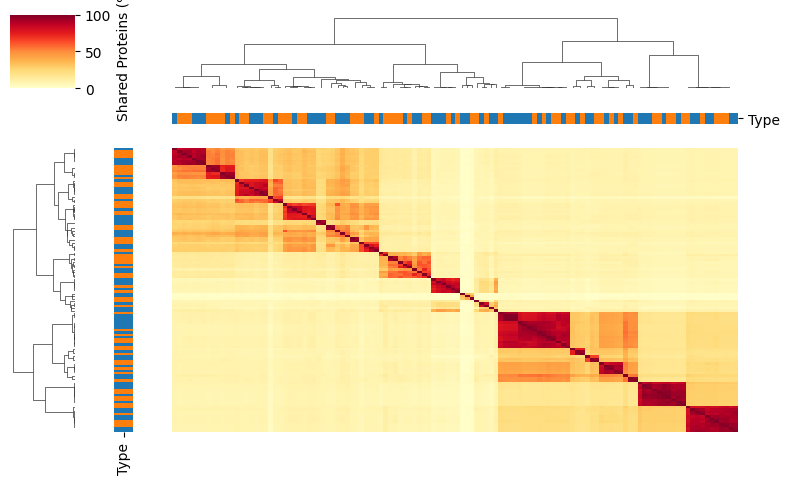

In [51]:
# Create a new dataframe for the sample type
sample_type = pd.DataFrame(index=result_df.index)
sample_type['Type'] = ['Control' if name.startswith('c') else 'Patient' for name in result_df.index]

# Create a color palette for the sample types
colors = {'Control': '#1f77b4', 'Patient': '#ff7f0e'}

# Create the clustered heatmap with the additional color bar, with ward method
g = sns.clustermap(result_df, 
                   cmap="YlOrRd",
                   annot=False,
                   linewidths=0.0,
                   row_cluster=True,
                   col_cluster=True,
                   cbar_kws={'label': 'Shared Proteins (%)'},
                   dendrogram_ratio=(.1, .2),
                   figsize=(8, 5),
                   xticklabels=False,  
                   yticklabels=False, 
                   row_colors=sample_type['Type'].map(colors),
                   col_colors=sample_type['Type'].map(colors),
                   method='ward')


g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')

# Customize the plot
#plt.suptitle("Heatmap of Shared Proteins Between Crass-like Phages", fontsize=16, y=1.02)

# Add a legend for the sample types
#handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
#plt.legend(handles, colors.keys(), title='Sample Type', 
#           loc='lower right', bbox_to_anchor=(1.25, 1.1), borderaxespad=0)

plt.tight_layout()
plt.show()
g.savefig("heatmap_red.svg")

In [52]:
linkage_matrix = g.dendrogram_row.linkage

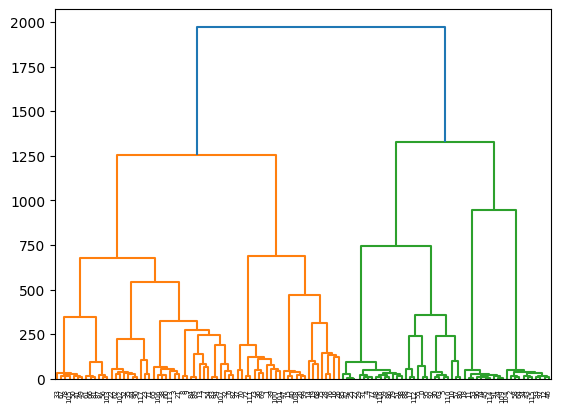

In [53]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(linkage_matrix)
plt.show()

In [54]:
from scipy.cluster.hierarchy import fcluster
num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [55]:
cluster_df = pd.DataFrame({'cluster': clusters, 'phage': result_df.index})

In [56]:
cluster_df

,cluster,phage
0,3,c102_node_357
1,2,c102_node_469
2,4,c103_node_93
3,1,c105_node_57
4,3,c107_node_114
...,...,...
113,1,p87_node_259
114,4,p88_node_100
115,4,p88_node_114
116,3,p94_node_100


In [57]:
cluster_df.to_csv('clusters.tsv', sep='\t', index=False)

#### check if there are any cluster statistically related to the control/parkinson group

In [58]:
from scipy import stats

In [59]:
binary_matrix_index = binary_df.reset_index()

In [60]:
control_samples = binary_matrix_index.columns[binary_matrix_index.columns.str.startswith('c')]
patient_samples = binary_matrix_index.columns[binary_matrix_index.columns.str.startswith('p')]

In [61]:
results = []
for gene in binary_matrix_index.index:
    control_present = binary_matrix_index.loc[gene, control_samples].sum()
    control_absent = len(control_samples) - control_present
    patient_present = binary_matrix_index.loc[gene, patient_samples].sum()
    patient_absent = len(patient_samples) - patient_present
    
    contingency_table = [[control_present, control_absent],
                         [patient_present, patient_absent]]
    
    odds_ratio, p_value = stats.fisher_exact(contingency_table)
    
    results.append({
        'gene': gene,
        'odds_ratio': odds_ratio,
        'p_value': p_value
    })


In [63]:
# 4. Create a DataFrame with results
results_df = pd.DataFrame(results)

# 5. Apply multiple testing correction (Benjamini-Hochberg)
results_df['adjusted_p_value'] = stats.false_discovery_control(results_df['p_value'])

# 6. Sort results by adjusted p-value
results_df = results_df.sort_values('adjusted_p_value')

# 7. Print top significant results
print(results_df.head(10))

# 8. Save results to a CSV file
results_df.to_csv('gene_presence_absence_analysis.csv', index=False)

      gene  odds_ratio   p_value  adjusted_p_value
1215  1215         inf  0.495871               1.0
1214  1214    0.966102  1.000000               1.0
1213  1213    0.966102  1.000000               1.0
1212  1212    0.966102  1.000000               1.0
1211  1211    0.966102  1.000000               1.0
1210  1210    0.966102  1.000000               1.0
1209  1209    0.966102  1.000000               1.0
1208  1208    0.000000  0.239461               1.0
1207  1207    0.000000  0.239461               1.0
1206  1206         inf  0.495871               1.0


#### package versions for reproducibility

In [72]:
import subprocess

def print_package_versions(packages):
  """Prints versions of specified packages using pip freeze."""
  try:
    output = subprocess.check_output(['pip', 'freeze']).decode('utf-8')
    for line in output.splitlines():
      for package in packages:
        if package in line:
          print(line)
  except subprocess.CalledProcessError as e:
    print(f"Error getting package versions: {e}")

# Specify the packages you want to check
packages = ['scipy', 'numpy', 'pandas', 'seaborn', 'matplotlib']
print_package_versions(packages)

matplotlib==3.9.2
matplotlib-inline @ file:///home/conda/feedstock_root/build_artifacts/matplotlib-inline_1713250518406/work
numpy==2.1.0
pandas==2.2.2
scipy==1.14.0
seaborn==0.13.2
